In [2]:
import sys
sys.path.append("../scripts")

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go 

from LSTM import PortfolioPredicitionsLSTM
from plot_utils import *

# Import des données

In [3]:
titres = {"Apple": pd.read_csv("../data/AAPL.csv"),
          "Amazon": pd.read_csv("../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../data/BRK-B.csv"),
          "Google": pd.read_csv("../data/GOOG.csv"),
          "Meta":  pd.read_csv("../data/META.csv"),
          "Microsoft": pd.read_csv("../data/MSFT.csv"),
          "Nvidia": pd.read_csv("../data/NVDA.csv"),
          "Tesla": pd.read_csv("../data/TSLA.csv"),
          "UnitedHealth": pd.read_csv("../data/UNH.csv"),
          "Exxon": pd.read_csv("../data/XOM.csv")}

# Modélisation LSTM

In [4]:
LSTM = PortfolioPredicitionsLSTM(titres, 30, 50)

In [5]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

100%|██████████| 10/10 [05:51<00:00, 35.11s/it]


# Performances des modélisations individuelles

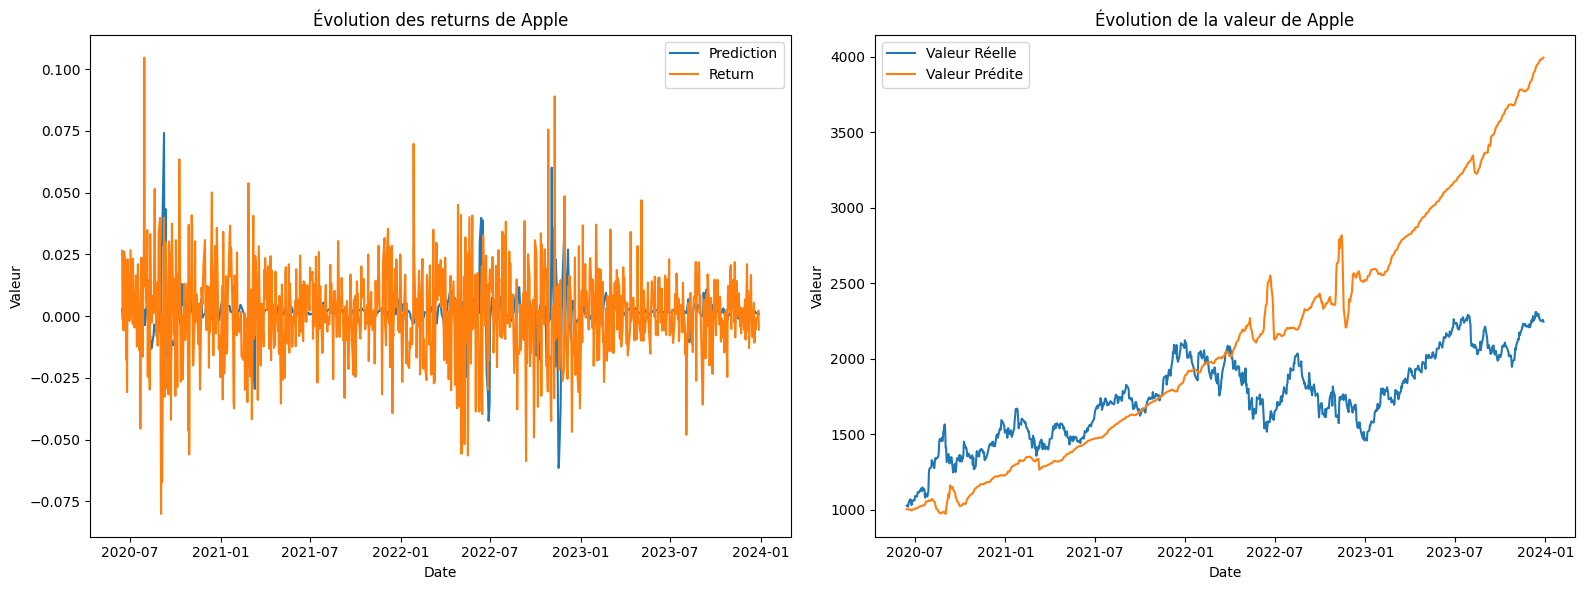

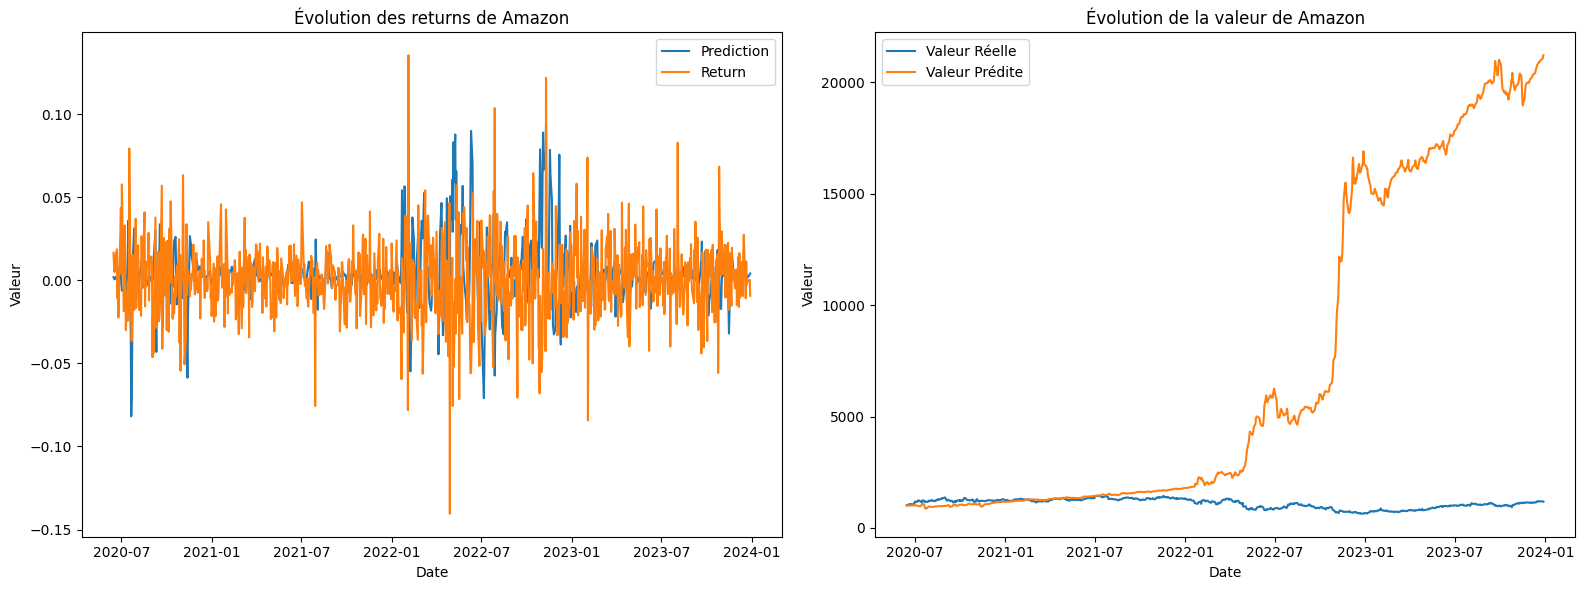

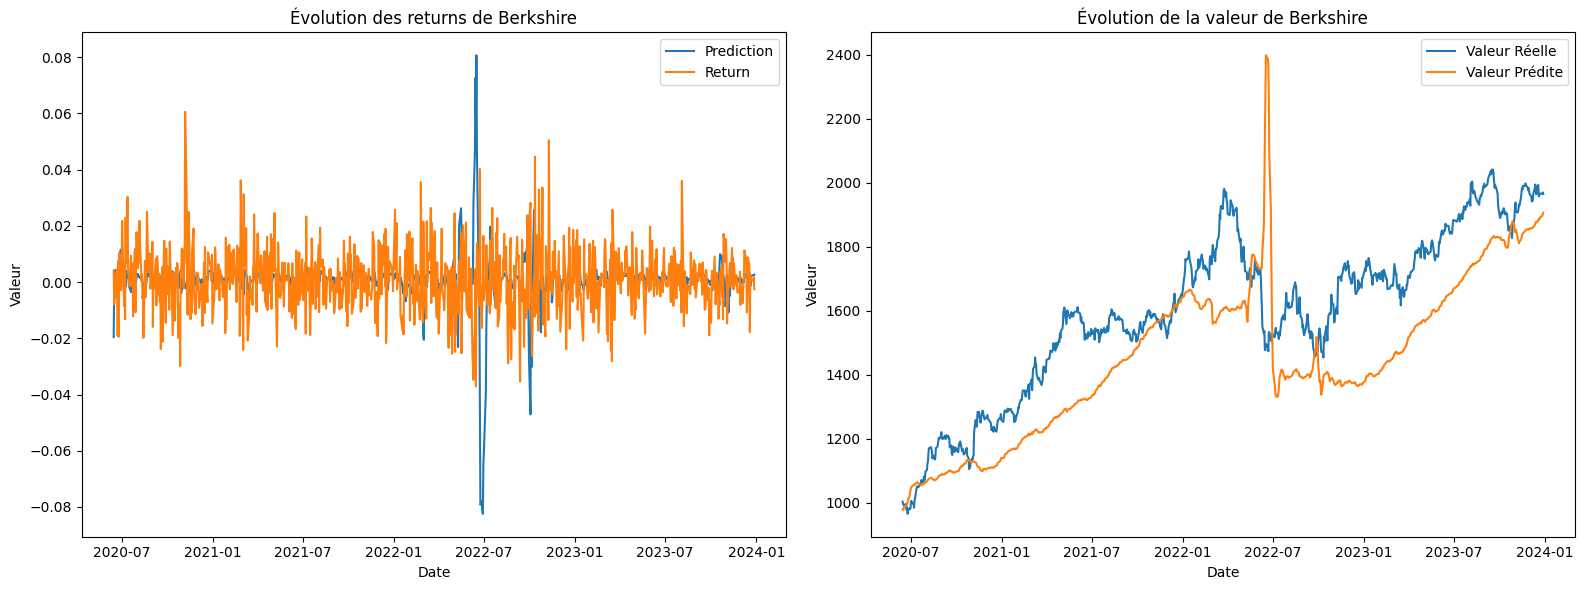

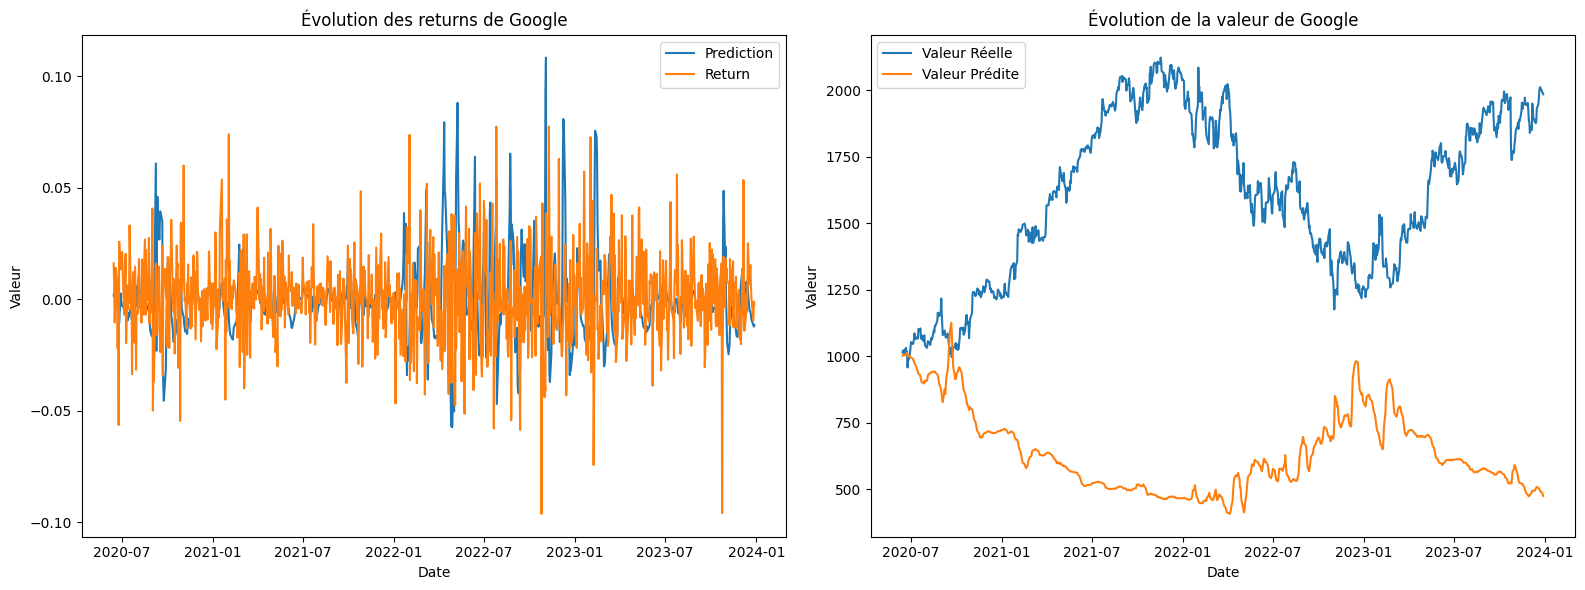

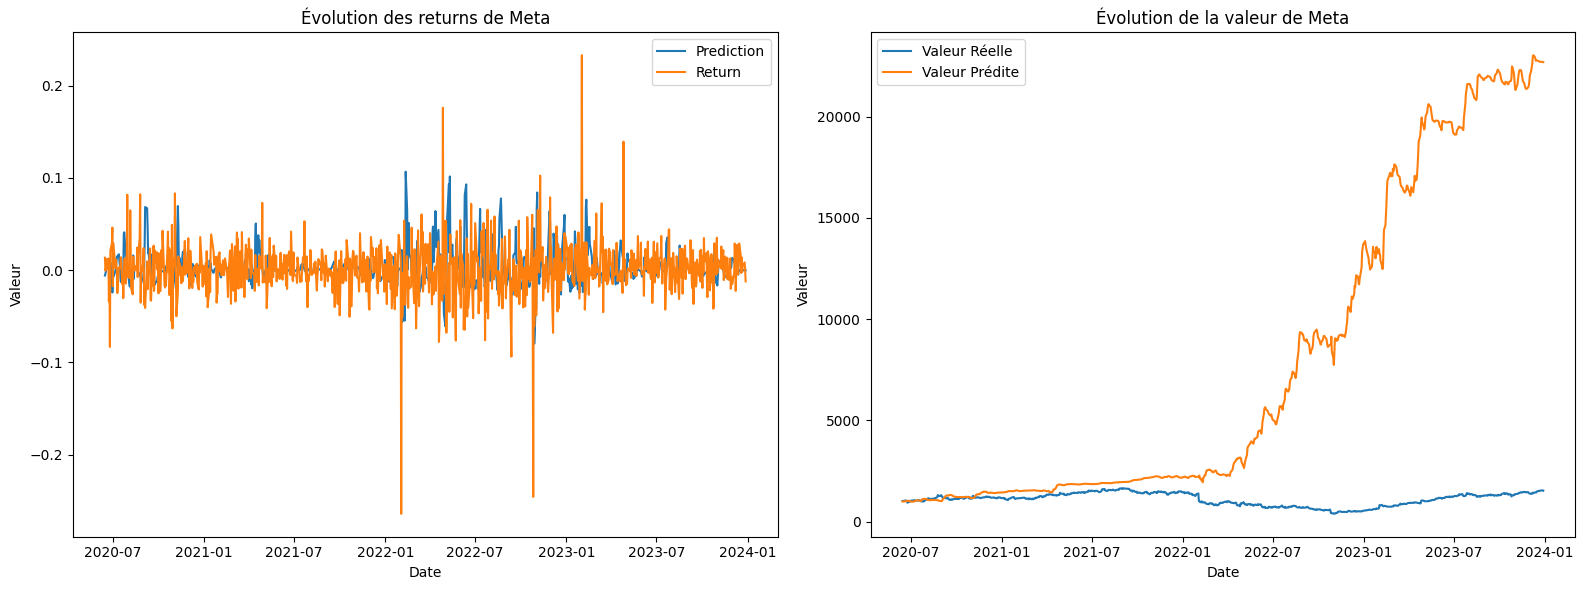

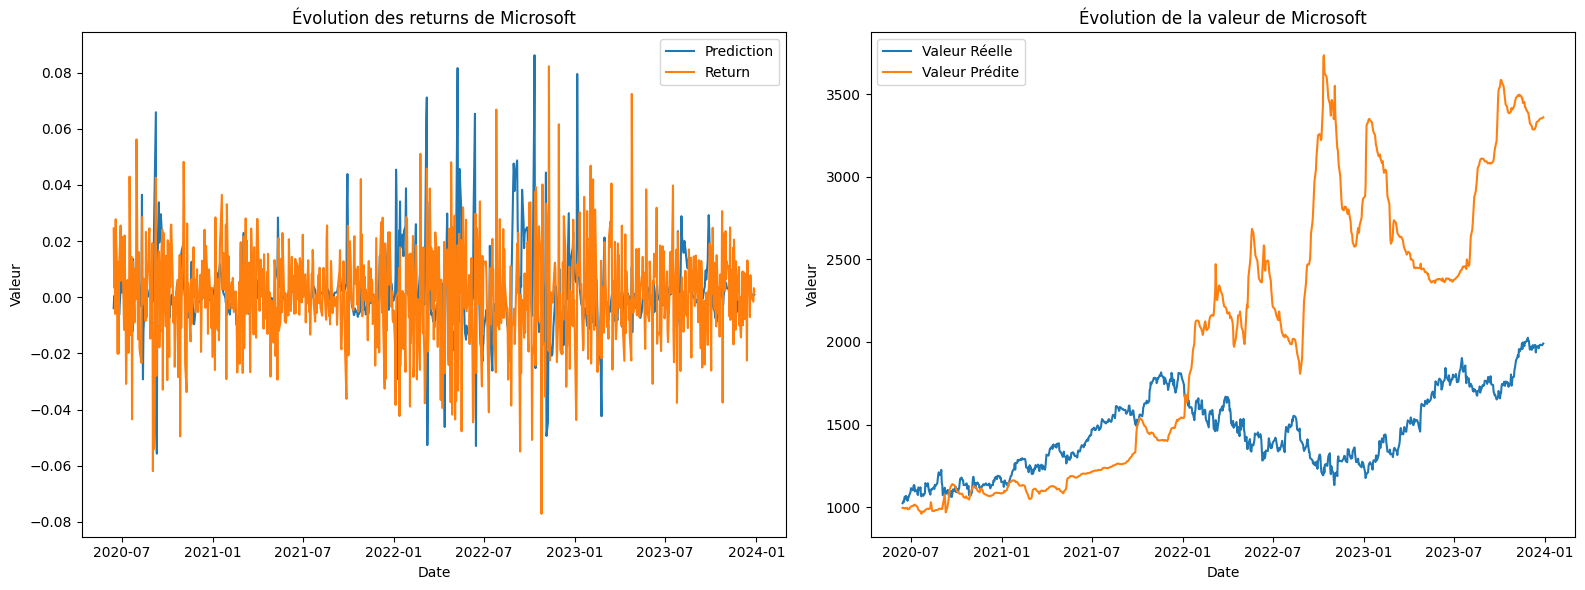

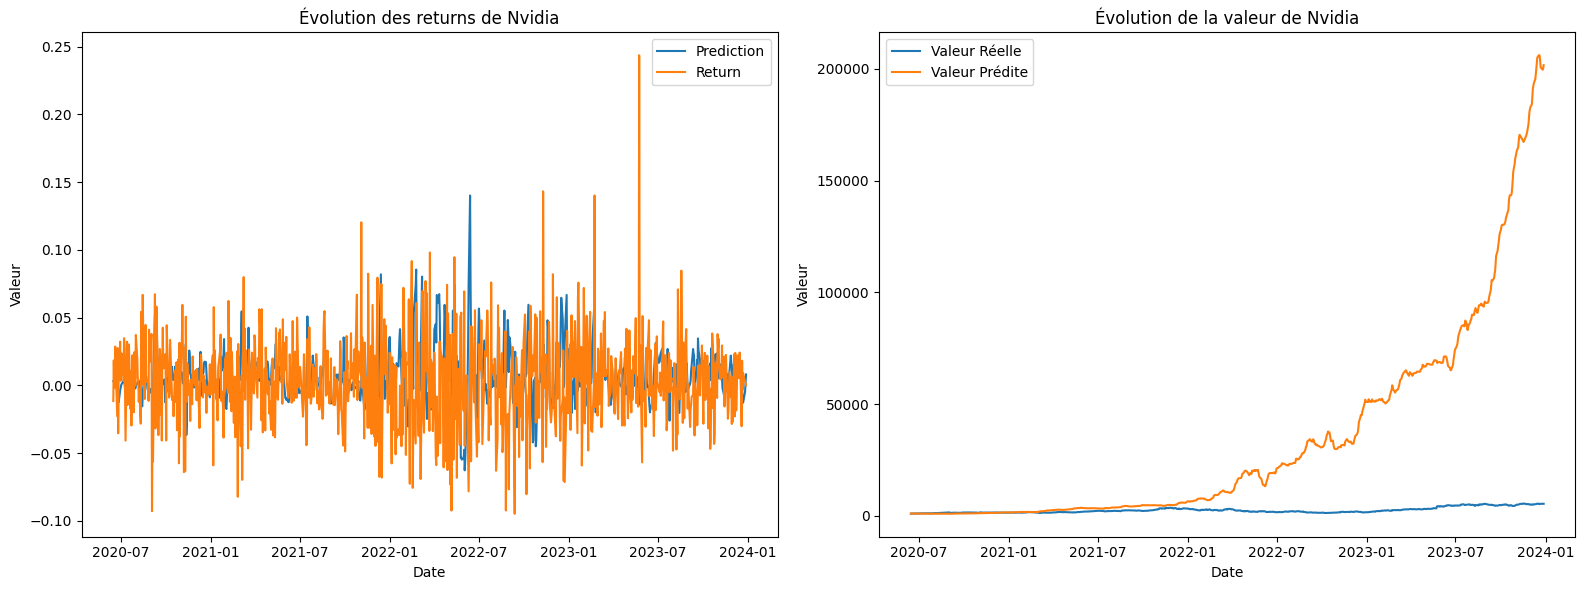

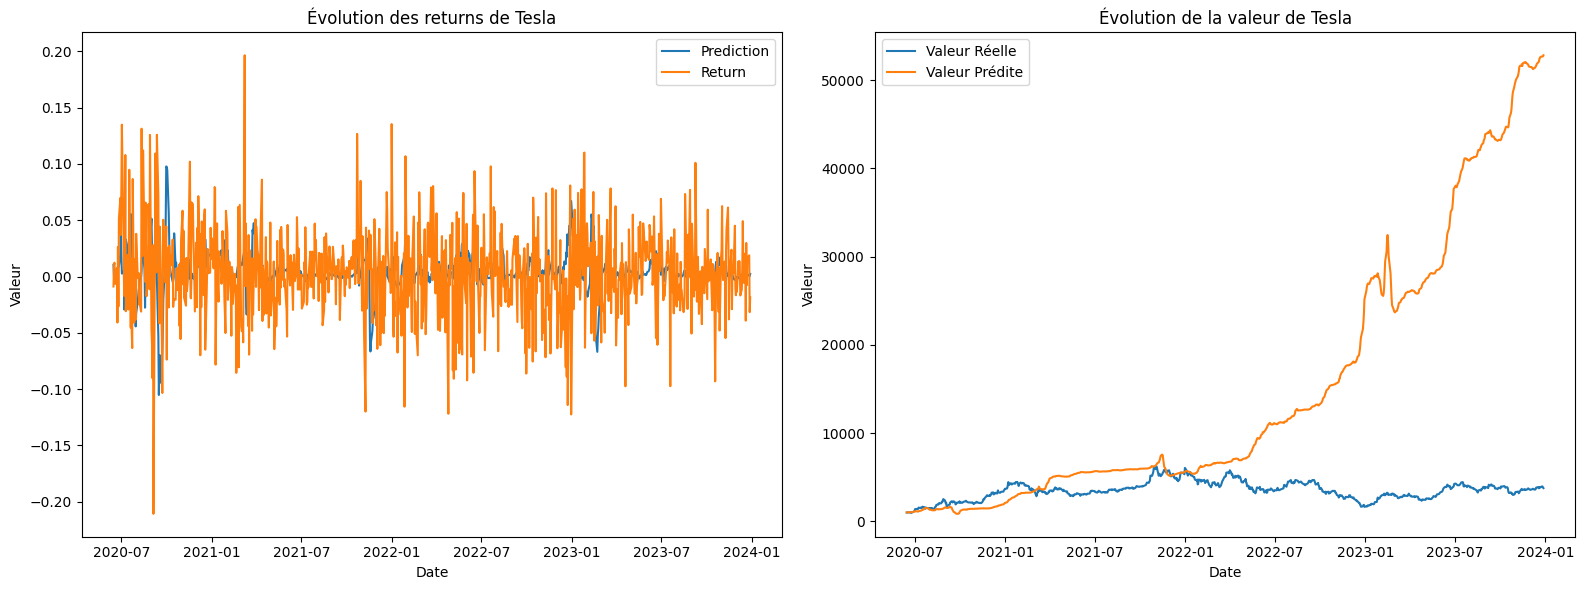

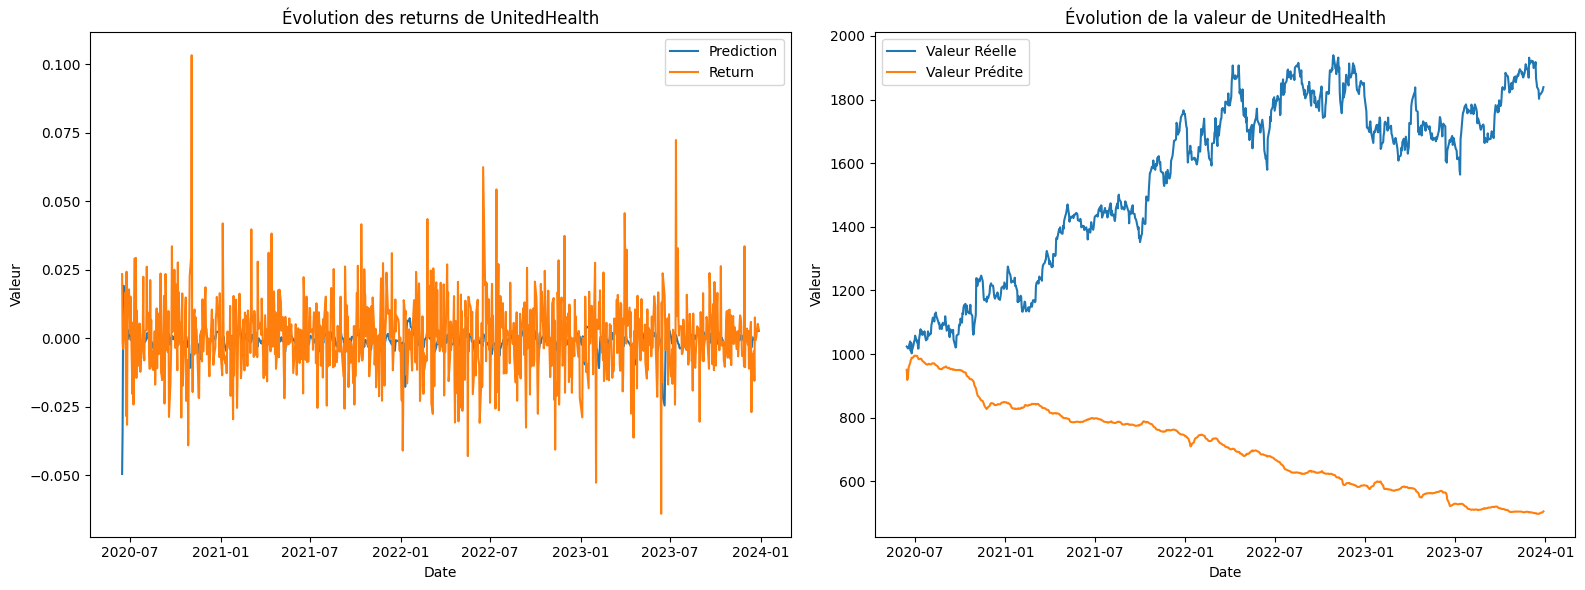

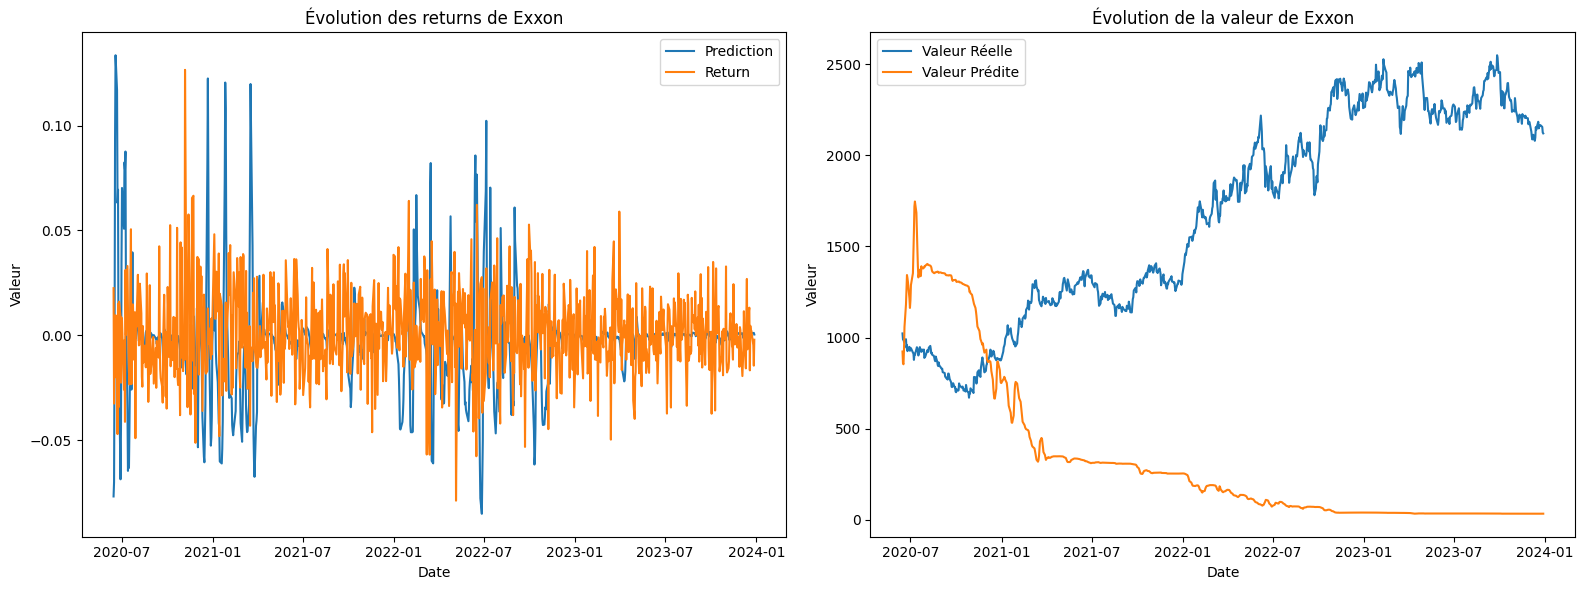

In [6]:
for key in predictions:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    display_return(predictions[key], key, ax1)
    display_evolution(predictions[key], key, ax2)

    plt.tight_layout()
    plt.show()

# Performances du portefeuille

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = ptf_avg.Date,
                         y = ptf_avg['Real_Portfolio_Value'],
                         mode = 'lines',
                         name ='réel',
                         fill = "tozeroy"))

fig.add_trace(go.Scatter(x = ptf_avg.Date,
                         y = ptf_avg['Predicted_Portfolio_Value'],
                         mode = 'lines',
                         name ='prédit',
                         fill = "tozeroy"))

fig.update_layout(title="Évolution de la valeur de ptf",
                  xaxis_title='Date',
                  yaxis_title='Valeur')

fig.show()